# 1. Binary Classification 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_network import NeuralNetwork 

ModuleNotFoundError: No module named 'neural_network'

In [ ]:
data = load_breast_cancer()
X, Y = data.data, data.target

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X.shape, Y.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.reshape(1, -1), Y_test.reshape(1, -1)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((30, 455), (30, 114), (1, 455), (1, 114))

In [ ]:
nn = NeuralNetwork(
    layers_dims=[X_train.shape[0], 128, 64, 32, 16, 1],
    activations=['relu', 'relu', 'relu', 'relu', 'sigmoid'],
    loss='binary_cross_entropy'
)

nn.summary()

Neural Network Architecture:
 Layer 1: 30 → 128 (relu)
 Layer 2: 128 → 64 (relu)
 Layer 3: 64 → 32 (relu)
 Layer 4: 32 → 16 (relu)
 Layer 5: 16 → 1 (sigmoid)
 Loss Function: binary_cross_entropy


In [ ]:
nn.train(X_train, Y_train, epochs=10000, lr=0.1)


Epoch 0: loss = 0.4251
Epoch 1: loss = 0.4249
Epoch 2: loss = 0.4248
Epoch 3: loss = 0.4246
Epoch 4: loss = 0.4244
Epoch 5: loss = 0.4242
Epoch 6: loss = 0.4240
Epoch 7: loss = 0.4238
Epoch 8: loss = 0.4237
Epoch 9: loss = 0.4235
Epoch 10: loss = 0.4233
Epoch 11: loss = 0.4231
Epoch 12: loss = 0.4229
Epoch 13: loss = 0.4228
Epoch 14: loss = 0.4226
Epoch 15: loss = 0.4224
Epoch 16: loss = 0.4222
Epoch 17: loss = 0.4220
Epoch 18: loss = 0.4219
Epoch 19: loss = 0.4217
Epoch 20: loss = 0.4215
Epoch 21: loss = 0.4213
Epoch 22: loss = 0.4211
Epoch 23: loss = 0.4210
Epoch 24: loss = 0.4208
Epoch 25: loss = 0.4206
Epoch 26: loss = 0.4204
Epoch 27: loss = 0.4202
Epoch 28: loss = 0.4201
Epoch 29: loss = 0.4199
Epoch 30: loss = 0.4197
Epoch 31: loss = 0.4195
Epoch 32: loss = 0.4193
Epoch 33: loss = 0.4192
Epoch 34: loss = 0.4190
Epoch 35: loss = 0.4188
Epoch 36: loss = 0.4186
Epoch 37: loss = 0.4185
Epoch 38: loss = 0.4183
Epoch 39: loss = 0.4181
Epoch 40: loss = 0.4179
Epoch 41: loss = 0.4177
Ep

In [ ]:
Y_pred = nn.predict(X_test)
Y_pred

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1]])

In [ ]:
nn.evaluate(X_test, Y_test)

Evaluation results:
 Loss = 0.9695
 Accuracy = 94.74%


(0.9695095221810521, 0.9473684210526315)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

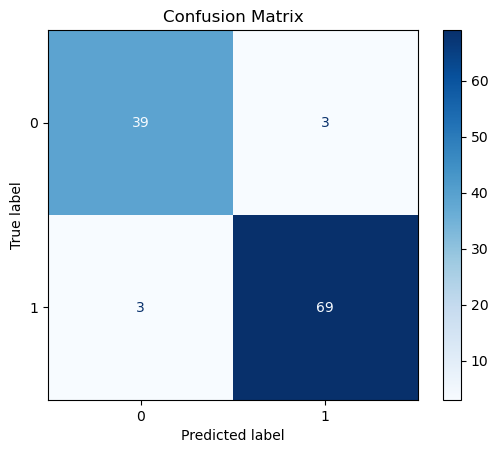

In [ ]:
cm = confusion_matrix(Y_test.flatten(), Y_pred.flatten())

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(classification_report(Y_pred.flatten(), Y_test.flatten()))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# 2. Regression

In [ ]:
from sklearn.datasets import fetch_california_housing

(20640, 8) (20640,)


In [ ]:
data = fetch_california_housing()
X, Y = data.data, data.target
print(X.shape, Y.shape)

(20640, 8) (20640,)


In [ ]:
Y = Y.reshape(1, -1)

In [ ]:
Y.shape

(1, 20640)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

NameError: name 'train_test_split' is not defined

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T  
X_test = scaler.transform(X_test).T  

In [ ]:
nn = NeuralNetwork(
    layers_dims=[X_train.shape[0], 64, 32, 16, 1],
    activations=['relu', 'relu', 'relu', 'linear'],  
    loss='mse'
)
nn.summary()

In [ ]:
nn.train(X_train, Y_train, epochs=2000, lr=0.01, print_loss=True)

In [ ]:
Y_pred = nn.predict(X_test)
mse = np.mean((Y_pred - Y_test)**2)
print(f"\nTest MSE: {mse:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test.flatten(), Y_pred.flatten(), alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Predictions (NN vs True)")
plt.grid(True)
plt.show()